Dataset shape: (11055, 30)
Target distribution:
 Result
 1    6157
-1    4898
Name: count, dtype: int64

Random Forest Accuracy: 0.9742198100407056

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Random Forest model saved at models/rf_model.pkl

Logistic Regression Accuracy: 0.9285391225689733
Logistic Regression model saved at models/lr_model.pkl

SVM Accuracy: 0.9520578923563998
SVM model saved at models/svm_model.pkl


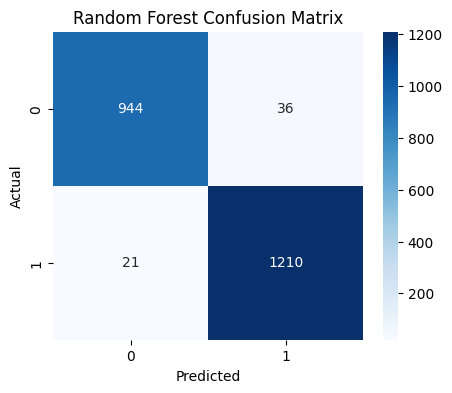

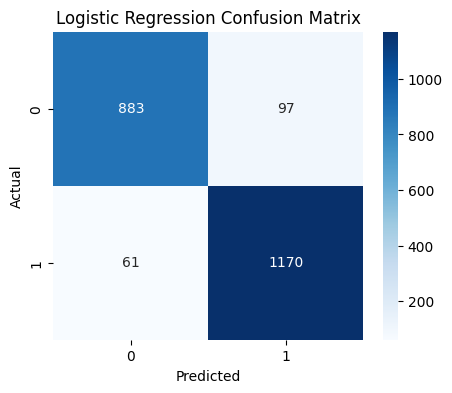

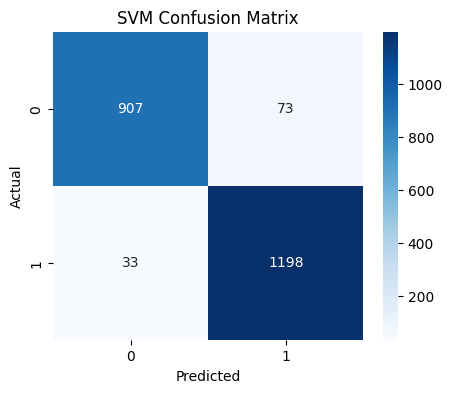

In [7]:
# ===============================
# Phishing Detection Project (ML only)
# ===============================

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
import openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2️⃣ Load dataset from OpenML
print("Downloading dataset from OpenML...")
ds = openml.datasets.get_dataset(4534)
X, y, _, _ = ds.get_data(target=ds.default_target_attribute)
y = y.astype(int)

print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts())

# 3️⃣ Preprocessing
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["number"]).columns.tolist()

if cat_cols:
    oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    X_cat = oe.fit_transform(X[cat_cols])
    X_num = X[num_cols].values if num_cols else None
    if X_num is None:
        X_proc = pd.DataFrame(X_cat, columns=cat_cols)
    else:
        X_proc = pd.DataFrame(X_cat, columns=cat_cols)
        for i, col in enumerate(num_cols):
            X_proc[col] = X_num[:, i]
else:
    X_proc = X.copy()

X_final = X_proc.values

# Scale features (optional for some ML models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# 4️⃣ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# Random Forest Classifier
# =========================
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Save Random Forest model
os.makedirs("models", exist_ok=True)
joblib.dump(rf_model, "models/rf_model.pkl")
print("Random Forest model saved at models/rf_model.pkl")

# =========================
# Logistic Regression
# =========================
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
joblib.dump(lr_model, "models/lr_model.pkl")
print("Logistic Regression model saved at models/lr_model.pkl")

# =========================
# Support Vector Machine
# =========================
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
joblib.dump(svm_model, "models/svm_model.pkl")
print("SVM model saved at models/svm_model.pkl")

# =========================
# Optional: Plot confusion matrices
# =========================
models_preds = {
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm
}

for name, y_pred in models_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Epoch 1/15


c:\Users\dhill\phishing_detection\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8110 - loss: 0.4065 - val_accuracy: 0.9305 - val_loss: 0.1900
Epoch 2/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9124 - loss: 0.2283 - val_accuracy: 0.9406 - val_loss: 0.1671
Epoch 3/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9200 - loss: 0.2001 - val_accuracy: 0.9423 - val_loss: 0.1605
Epoch 4/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9261 - loss: 0.1859 - val_accuracy: 0.9406 - val_loss: 0.1578
Epoch 5/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9296 - loss: 0.1776 - val_accuracy: 0.9412 - val_loss: 0.1552
Epoch 6/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9296 - loss: 0.1713 - val_accuracy: 0.9429 - val_loss: 0.1537
Epoch 7/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9300 - loss: 0.1643 - val_accuracy: 0.9435 - val_loss: 0.1509
Epoch 8/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9319 - loss: 0.1581 - val_accuracy: 0.9452 - val_


Deep Learning Model Accuracy: 0.9484395980834961
Deep Learning model saved at models/dl_model.h5


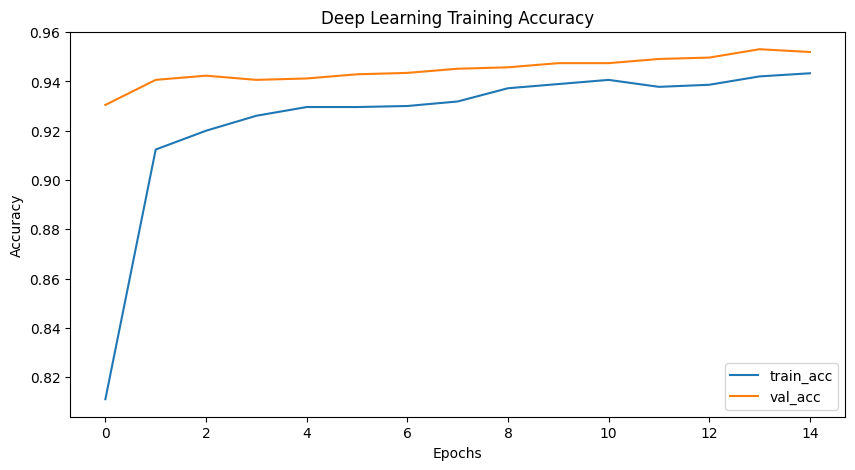

In [6]:
# =========================
# Deep Learning Model (Revised)
# =========================

# Map -1 to 0 for binary classification
y_train_dl = (y_train == 1).astype(int)
y_test_dl = (y_test == 1).astype(int)

# Build model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # single output neuron
])

# Compile model
dl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Train model
history = dl_model.fit(
    X_train, y_train_dl,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate model
loss, acc = dl_model.evaluate(X_test, y_test_dl)
print("\nDeep Learning Model Accuracy:", acc)

# Save model
dl_model.save("models/dl_model.h5")
print("Deep Learning model saved at models/dl_model.h5")

# =========================
# Plot training history
# =========================
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Deep Learning Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



🔍 Generating SHAP explainability for Random Forest...


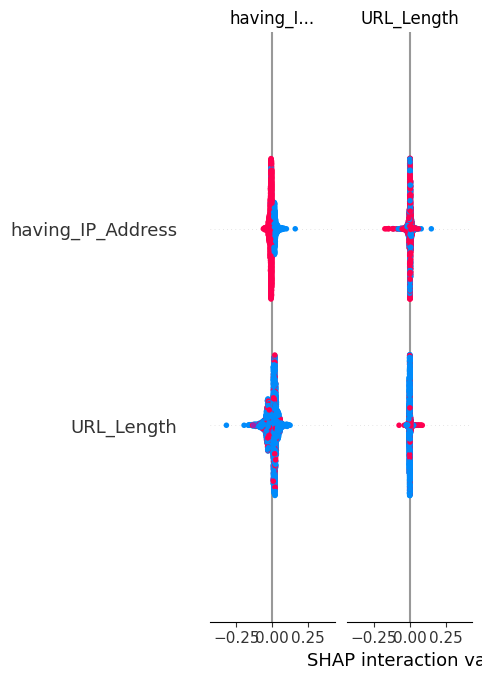

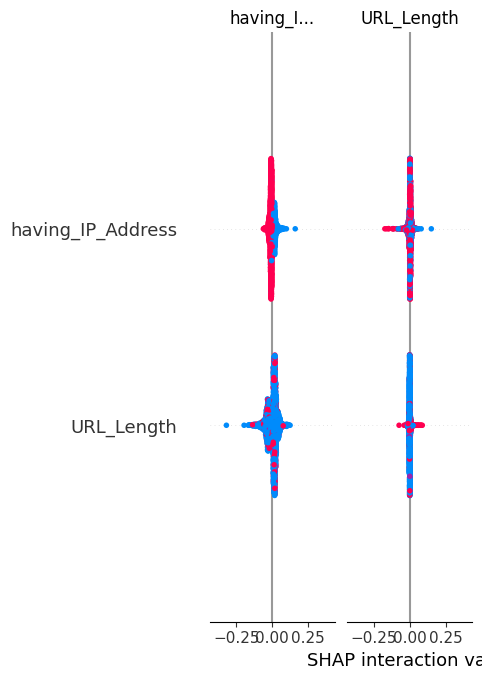


🔍 Generating SHAP explainability for Deep Learning model...
⚠️ Adjusting feature names: DL SHAP output has 1 features.


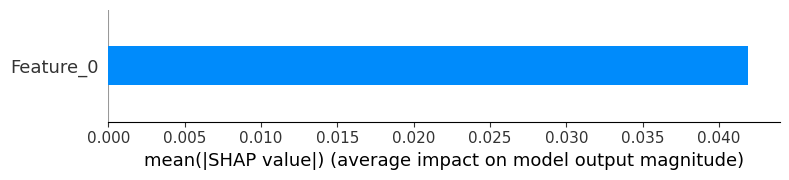

AssertionError: Feature and SHAP matrices must have the same number of rows!

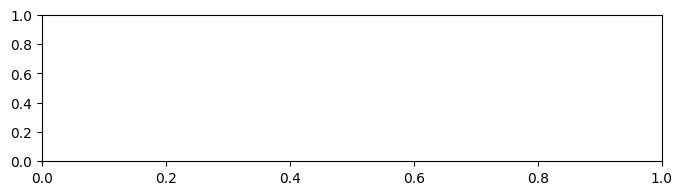

In [10]:

# ===============================
# 6️⃣ SHAP Explainability
# ===============================
import shap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure X_test is a DataFrame with column names
X_test_df = pd.DataFrame(X_test, columns=X_proc.columns)

# ---- SHAP for Random Forest ----
print("\n🔍 Generating SHAP explainability for Random Forest...")
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_df)

# Feature importance plots
shap.summary_plot(shap_values_rf, X_test_df, plot_type="bar")
shap.summary_plot(shap_values_rf, X_test_df)

# ---- SHAP for Deep Learning ----
print("\n🔍 Generating SHAP explainability for Deep Learning model...")
background = X_train[:100]  # small subset for background
X_test_sample = X_test[:200]  # smaller sample for speed

explainer_dl = shap.DeepExplainer(dl_model, background)
shap_values_dl = explainer_dl.shap_values(X_test_sample)

# Ensure feature alignment
num_features = shap_values_dl[1].shape[1]
if X_test_sample.shape[1] != num_features:
    print(f"⚠️ Adjusting feature names: DL SHAP output has {num_features} features.")
    X_test_sample_df = pd.DataFrame(
        X_test_sample[:, :num_features],
        columns=[f"Feature_{i}" for i in range(num_features)]
    )
else:
    X_test_sample_df = pd.DataFrame(X_test_sample, columns=X_proc.columns[:num_features])

# Summary plots for phishing class (index 1)
shap.summary_plot(shap_values_dl[1], X_test_sample_df, plot_type="bar")
shap.summary_plot(shap_values_dl[1], X_test_sample_df)

# ===============================
# 7️⃣ Risk Score Calculation
# ===============================
print("\n📊 Calculating Risk Scores using Random Forest probabilities...")
risk_scores = rf_model.predict_proba(X_test_df)[:, 1]  # probability of phishing
risk_df = pd.DataFrame({"RiskScore": risk_scores, "TrueLabel": y_test})
print(risk_df.head())

# Visualize risk score distribution
plt.figure(figsize=(8, 5))
sns.histplot(risk_scores, bins=20, kde=True, color="royalblue")
plt.title("Predicted Risk Scores for Phishing URLs")
plt.xlabel("Risk Score (Probability of Phishing)")
plt.ylabel("Count")
plt.show()

# Save risk scores
os.makedirs("models", exist_ok=True)
risk_df.to_csv("models/risk_scores.csv", index=False)
print("✅ Risk scores saved at models/risk_scores.csv")




🔍 Generating SHAP explainability for Random Forest...


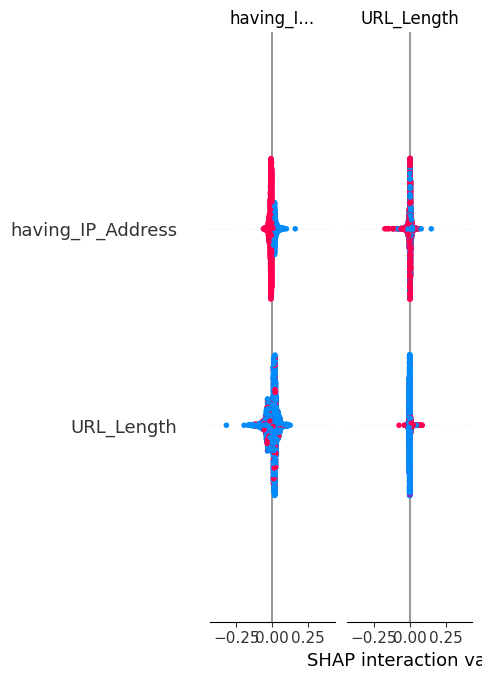

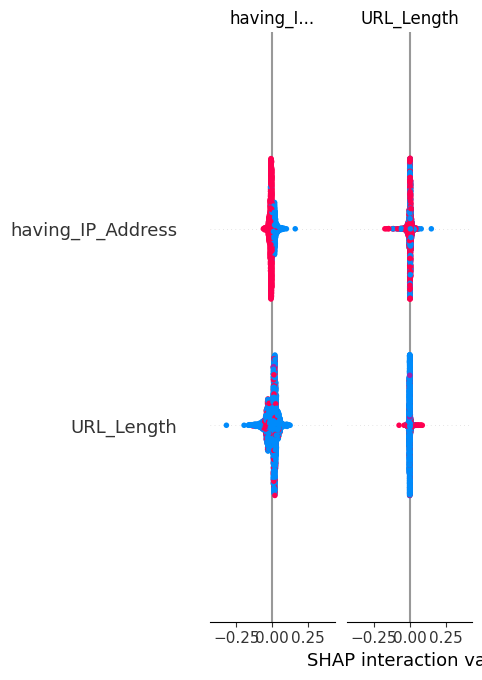


🔍 Generating SHAP explainability for Deep Learning model...
✅ Using SHAP array directly.


ValueError: too many values to unpack (expected 2)

In [11]:
# ===============================
# 6️⃣ SHAP Explainability + Risk Scores
# ===============================
import shap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# -------------------------------
# Prepare X_test DataFrame
# -------------------------------
X_test_df = pd.DataFrame(X_test, columns=X_proc.columns)

# ===============================
# Random Forest SHAP
# ===============================
print("\n🔍 Generating SHAP explainability for Random Forest...")
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_df)

# Summary plots
shap.summary_plot(shap_values_rf, X_test_df, plot_type="bar")
shap.summary_plot(shap_values_rf, X_test_df)

# ===============================
# Deep Learning SHAP
# ===============================
print("\n🔍 Generating SHAP explainability for Deep Learning model...")

background = X_train[:100]   # small background for speed
X_test_sample = X_test[:200] # sample for speed

explainer_dl = shap.DeepExplainer(dl_model, background)
shap_values_dl = explainer_dl.shap_values(X_test_sample)

# Determine correct SHAP array
if isinstance(shap_values_dl, list) and len(shap_values_dl) == 1:
    shap_array = shap_values_dl[0]  # binary classification
    print("✅ Using single-output SHAP array for binary classification.")
elif isinstance(shap_values_dl, list) and len(shap_values_dl) > 1:
    shap_array = shap_values_dl[1]  # phishing class
    print("✅ Using SHAP array for phishing class (multi-class).")
else:
    shap_array = shap_values_dl
    print("✅ Using SHAP array directly.")

# Align features
num_samples, num_features = shap_array.shape
X_test_sample_df = pd.DataFrame(
    X_test_sample[:num_samples, :num_features],
    columns=[f"Feature_{i}" for i in range(num_features)]
)

# Summary plots
shap.summary_plot(shap_array, X_test_sample_df, plot_type="bar")
shap.summary_plot(shap_array, X_test_sample_df)

# ===============================
# Risk Score Calculation (Random Forest)
# ===============================
print("\n📊 Calculating Risk Scores using Random Forest probabilities...")

risk_scores = rf_model.predict_proba(X_test_df)[:, 1]  # phishing probability
risk_df = pd.DataFrame({"RiskScore": risk_scores, "TrueLabel": y_test})

# Display head
print(risk_df.head())

# Risk score distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(risk_scores, bins=20, kde=True, color="royalblue")
plt.title("Predicted Risk Scores for Phishing URLs")
plt.xlabel("Risk Score (Probability of Phishing)")
plt.ylabel("Count")
plt.show()

# Save risk scores
os.makedirs("models", exist_ok=True)
risk_df.to_csv("models/risk_scores.csv", index=False)
print("✅ Risk scores saved at models/risk_scores.csv")

# ===============================
# Combined Feature Importance (Optional)
# ===============================
# Take mean absolute SHAP values for both models
rf_importance = np.mean(np.abs(shap_values_rf[1]), axis=0)
dl_importance = np.mean(np.abs(shap_array), axis=0)

combined_importance = pd.DataFrame({
    "Feature": X_test_df.columns[:len(rf_importance)],
    "RF_SHAP": rf_importance,
    "DL_SHAP": dl_importance[:len(rf_importance)]  # align features
})

combined_importance.set_index("Feature", inplace=True)
combined_importance.plot(kind="bar", figsize=(12,6))
plt.title("Feature Importance Comparison: Random Forest vs Deep Learning")
plt.ylabel("Mean |SHAP Value|")
plt.show()
